# Multiple Linear Regression

## Package Imports

Code to import some packages has been included below.  Feel free to import any additional packages that you need here, or later in the assignment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

## <u>Case Study</u>: Popular Netflix Programs

We would like to predict the ratings of titles that are listed on Netflix, based on various characteristics about those titles.  To do so, we will analyze the netflix.csv dataset that is located in this folder.

The netflix dataset contains the following variables for each of the programs:

- **title**: the title of the program
- **popular_rank**: ranking as determined by IMDb when filtered by popularity
- **startYear**: when the program was first broadcasted
- **runtime**: the length of a typical episode or the length of the movie, measured in minutes
- **type**: the type of program (e.g. tv show or movie)
- **origin_country**: country of origin of the program
- **language**: the language of the program
- **rating**: average rating given to the show, out of 10.

Of these variables, we will explore the startYear, runtime, type, origin_country, language, and rating in our analysis.  We will focus on predicting the rating from some or all of the other variables in our dataset.

## 1. Data Processing and Cleaning 

**a)** First, we need to read in and clean the data.

1. Read the netflix.csv into a dataframe.
 - *This dataset has missing values!  Specifically, the phrases "" (empty), "\\N", and "-" are all used to represent missing values in this csv.  Make sure you encode these values as NaN when you read the data in.  Quick tip: include a double \ in front of the N for Python to read this string correctly.  You can look at the markdown code in this cell to see how this should look.*
2. Print the dimensions of the netflix dataset.
3. Drop the missing values from the netflix dataset.
4. Report how many complete titles remain in the dataset as well as how many titles were dropped from the dataset.

In [2]:
# 1 
missing_values = ["", "\\N", "-"]
df = pd.read_csv('netflix.csv', na_values=missing_values)

In [3]:
# 2
df.shape

(7008, 8)

In [4]:
# 3
netflix = df.dropna().reset_index(drop = True)

In [5]:
# 4
print(netflix.shape)
# 5047 complete titles remain in the dataset. 
print(df.shape[0] - netflix.shape[0])
# 1961 titles were dropped from the dataset. 

(5047, 8)
1961


**b)** Create two new variables in the dataset:

- **US_country**, an indicator variable for the program having a country of origin of the United States
- **English_language**, an indicator variable for the program's language being English

In [6]:
netflix['US_country'] = (netflix['origin_country'] == 'United States')
netflix['English_language'] = (netflix['language'] == 'English')
netflix.head()

,title,popular_rank,startYear,runtime,type,origin_country,language,rating,US_country,English_language
0,Lucifer,1,2016.0,42.0,tvSeries,United States,English,8.1,True,True
1,Army of the Dead,2,2021.0,148.0,movie,United States,English,5.8,True,True
2,The Kominsky Method,3,2018.0,30.0,tvSeries,United States,English,8.2,True,True
3,Friends,4,1994.0,22.0,tvSeries,United States,English,8.9,True,True
4,Ragnarok,5,2020.0,45.0,tvSeries,Norway,Norwegian,7.5,False,False


## 2. Fit & Use a Model 

**a)** Fit a linear model predicting the rating of a program on Netflix from the original broadcast year, runtime, type of program, whether the country of origin is the US, and whether the language of the program is English.

Print the summary results of the fitted linear model. 

In [7]:
results = smf.ols('rating ~ startYear + runtime + type + US_country + English_language', data=netflix).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     142.7
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          7.18e-309
Time:                        09:59:13   Log-Likelihood:                -7441.2
No. Observations:                5047   AIC:                         1.491e+04
Df Residuals:                    5034   BIC:                         1.499e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   40.3319      3.595     11.219      0.000      33.284      47.380
type[T.short]                0.9260      0.129      7.166      0.000       0.673       1.179
type[T.tvEpisode]            1.6404      0.062     26.558      0.000       1.519       1.761
type[T.tvMiniSeries]         1.1762      0.078     14.988      0.000       1.022       1.330
type[T.tvMovie]              0.2173      0.096      2.263      0.024       0.029       0.406
type[T.tvSeries]             1.3732      0.041     33.297      0.000       1.292       1.454
type[T.tvShort]              2.0414      0.475      4.297      0.000       1.110       2.973
type[T.tvSpecial]            0.7426      0.065     11.375      0.000       0.615       0.871
type[T.video]                0.3976      0.123      3.231      0.001       0.156       0.639
US_country[T.True]          -0.0962      0.041     -2.337      0.019      -0.177      -0.015
English_language[T.True]     0.0817      0.042      1.967      0.049       0.000       0.163
startYear                   -0.0171      0.002     -9.610      0.000      -0.021      -0.014
runtime                      0.0030      0.000      7.967      0.000       0.002       0.004
==============================================================================
Omnibus:                      480.215   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.758
Skew:                          -0.753   Prob(JB):                    1.50e-148
Kurtosis:                       3.986   Cond. No.                     4.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
df['type'].unique()

array(['tvSeries', 'movie', 'tvSpecial', 'tvMiniSeries', 'short', 'video',
       'tvMovie', 'tvShort', 'videoGame', 'tvEpisode', nan], dtype=object)

**b)** What is the predicted rating for a tv Special from 2021 that is 87 minutes, filmed in the US, and uses the English lanugage?

In [9]:
40.3319 + 0.7426 -0.0171 * 2021 + 0.0030 * 87 -0.0962 + 0.0817

6.7619

**c)** What is the corresponding residual for an Netflix program that has the characteristics described in **2b** and that has an actual rating of 5.3?

In [10]:
5.3 - 6.7619

-1.4619

**d)** How strong is the linear model?  Report a numerical measure of the strength of the overall model, and provide an interpretation for this value.

In [11]:
print('R-squared is',	0.254)

R-squared is 0.254


This means that 25.4 % of the variation in our response variable (ratings) is explained by its linear relationship with our predictor variables. 

## 3. Interpreting A Model 

We'll continue analyzing the model fit in Question 2a.  For this question, we'll put a specific emphasis on understanding and interpreting the model.

**a)** Write out one model using all of the coefficients.  Be sure to use appropriate notation & define any variables needed.

One model using all of the coefficients would be a model predicting rating for a tv short from starting year of $x_1$, which running time is $x_2$ minutes, filmed in U.S, and uses English. 

$\hat{y}  = 40.3319  +  0.9260  -0.0962  + 0.0817 - 0.0171  * x_1 + 0.0030	* x_2$

$\hat{y}$ is the estimated expected rating of this Netflix program(tv short, from the  U.S, using English) for a given $x_1$ and $x_2$ where $x_1$ is the startyear and $x_2$ is running time. 

**b)** Write out a simplified model for a movie that is not from the US & whose language is English.

Be sure to use appropriate notation.

$\hat{y} = 40.3319 + 0.0817 - 0.0171 * x_1 + 0.0030 * x_2$

$\hat{y}$ is the estimated expected rating of a Netflix program (movie, not from the US, whose language is English) for a given $x_1$(startyear) and $x_2$(runtime). 

**c)** What is the baseline or reference level for this model?

A netflix program which type is 'movie' and the origin country is not United States, and its language is not English. 

**d)** Describe in words (interpret) the following coefficients for the regression model:

- the coefficient for runtime
- the coefficient for whether the language of the program is English

All else held equal, for every 1 additional minute of running time, I estimate that the expected rating of a program will increase by 0.003, on average. 

All else held equal, if the language of the program is English, I estimate that the expected rating of a program will be higher than the program which language is not English by 0.0817. 

## 4. Linear Model Assumptions

In order for any inference that we'd like to perform from our model to be valid, we need to check some assumptions.  For this question, generate three graphs that we can use to check our assumptions.  

Then check each of our conditions for the linear model, based on the graphs or other information about the sample of programs in our dataset.

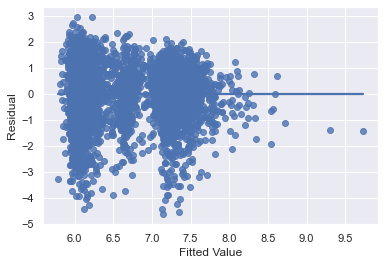

In [13]:
sns. regplot (x = results.fittedvalues, y = results.resid, ci = None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

First, we check linearity, checking if the true relationship between X and Y is linear. I can see not all observations are centered at e = 0 line for every estimated y(fitted values). So, I doubt that my linear assumption is reasonable. 

Second, I have to check if the variance of Y at each X is equal by checking if the scatter is equal at all fitted values. I don't think this equal variance assumption is plausible as my observations do not have similar scatter at almost all fitted values. 

Third, I should check if the true errors are independent. 

We cannot plot graphs to check this, but I think this is a random sample from our population and our sample size (5047) is less than 10% of population size, so this sample meets an assumption for independence. 

Text(0.5, 1.0, 'Histogram of Residuals')

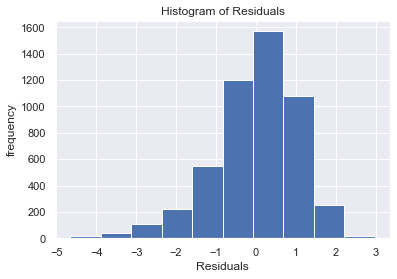

In [61]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.ylabel('frequency')
plt.title('Histogram of Residuals')

Fourth, I should check if the true errors are normally distributed. The residuals are asymmetric, rather left-skewed. (maybe its mean is 0 but I am not sure if it is exactly centered at 0) 

Therefore, our sample is not meeting an assumption of normality. 

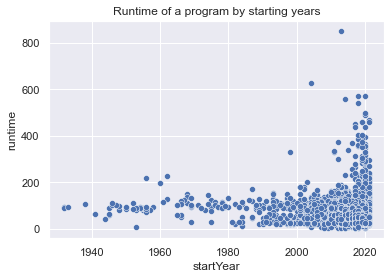

In [55]:
sns.scatterplot(x = 'startYear', y = 'runtime', data= netflix)
plt.title('Runtime of a program by starting years')
plt.show()

In [14]:
netflix[['startYear', 'runtime']].corr()

,startYear,runtime
startYear,1.000000,-0.031254
runtime,-0.031254,1.000000


We have to check 4 assumptions for linear regression (LINE) and one more assumption that our predictors are independent. 

We should check if there exists a multicollinearity between quantitaive variables (runtime and startYear), so I scatterplotted. 

Also, the correlation between two numerical variables is -0.031 so there do not seem to be a linear relationship between those two variables. 

## 5. Inference for Regression 

While we know that our inference results may not be valid if our conditions are not met from Question 4, we will proceed with the inference procedures.  Be aware that if our conditions are not met, we should be cautious in our interpretations of our inference results.

**a)**  Using the output from the Python regression, report the 95% confidence interval for whether the language of the program is English (after accounting for our other predictor variables).  Based on this confidence interval, is it reasonable to conclude that there is sufficient evidence to suggest a difference in the mean ratings for English language programs compared to those not in English, after accounting for the other variables in our model from Question 2?

In [12]:
# 95% confidence interval for whether the language of the program is English
(0.000, 0.163)

(0.0, 0.163)

We are 95% confident that the slope of a variable (0.0817), whether the language of the program is English (after accounting for our other predictor variables) is between 0 and 0.163. 

Therefore, it is reasonable to conclude that there is sufficient evidence to suggest there is a difference in the mean ratings for English language programs compared to those not in English. 

**b)** Suppose we are interested in determining if there is a linear relationship between the program ratings and the runtime of a show, after controlling for our other predictor variables from Q2.  Write out the corresponding hypotheses that we are testing.  Report the test statistic & p-value for this test.  Do we have evidence to support that there is a linear relationship?  You may use the Python output from the regression, if appropriate, for full credit for this question.

$H_0: \beta=0$

$H_A: \beta\neq0$

($\beta$ is the population slope that corresponds to the runtime of a show)

According to a table summary above, for a significance level $\alpha = 0.05$ the test statistic is 7.967 and p-value is 0.000. 

Therefore $p-value < \alpha$ and I can reject the null hypothesis. 

We have sufficient evidence to support that there is a linear relationship between the program ratings and the runtime of a show, after controlling for our other predictor variables from Q2. 

**c)**  Suppose that we previously have seen that the slope for the year the program was first broadcast used to predict program ratings is -0.015.  Is this reasonable in the context of the model fit from Q2?  In other words, if we assume that runtime, show type, whether the program is from the US, and whether the program is in English is held fixed, is this still a reasonable slope based on our sample data?

Perform the hypothesis test, specifically highlighting:

- the hypotheses being tested
- the test statistic
- the **exact** p-value
- the decision for the test

You may use the Python output from the regression, if appropriate, for full credit for this question.

1. We want to test if we have evidence to say that the value -0.015 would be a reasonable value as a slope for the year the program was first broadcast used to predict program ratings.

$H_0: \beta=-0.015$

$H_A: \beta\neq-0.015$

($\beta$ is the population slope that corresponds to the start year)

In [15]:
#2. calculate the test statistic and p-value

point_estimate=-0.0171
print('Point Estimate = Sample Slope = ', point_estimate)

standard_error=0.002
print('Standard Error', standard_error)

null_value=-0.015
print('Null Value:', null_value)

test_stat=(point_estimate-null_value)/standard_error
print('Test Statistic:', test_stat)

pvalue=2*(1-t.cdf(np.abs(test_stat), df=5034))
print('p-value', pvalue)

Point Estimate = Sample Slope =  -0.0171
Standard Error 0.002
Null Value: -0.015
Test Statistic: -1.0500000000000005
p-value 0.2937685167631301


3. The decision for the test : My p-value is 0.294, which is quite large. Therefore I would reject the null hypothesis that the population slope for the start year of a program is -0.015. This means I decide that a value of -0.015 as a slope for the startyear is unreasonable. 

## 6. Choosing a Best Model 

A data scientist is concerned that the model that we've just fit is a bit too complex for her preferences.  She'd like to remove a variable, either type or whether the project originates from the US.  In this problem, you will help her decide which variable to remove.

First, fit two new models:

- one with all of the variables from the Q3 model **except type**, and
- one with all of the variables from the Q3 model **except US_country**.

Then, you'll need to decide which of the two models that you prefer.  Specifically, you should examine the strength of these two models.  Based on the strength of these two models, which model would you prefer?

In [16]:
results_2 = smf.ols('rating ~ startYear + runtime + US_country + English_language', data=netflix).fit()
results_2.rsquared

0.019798351397630864

In [17]:
results_3 = smf.ols('rating ~ startYear + runtime + English_language', data=netflix).fit()
results_3.rsquared

0.018281330788866734

I prefer the first model, beacause it the result for the regression shows that the model which removed a variable 'type' has slightly higher R-squared value, implying the higher strength to explain the model.